In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from fswap import RefFaceSwapping , TwoFaceSwapping

## Swap from reference face

In [4]:
face_swapping = RefFaceSwapping(reference_path='imgs/reference.png')
img = face_swapping.load_img('imgs/img.png')
img_swap = face_swapping(img)

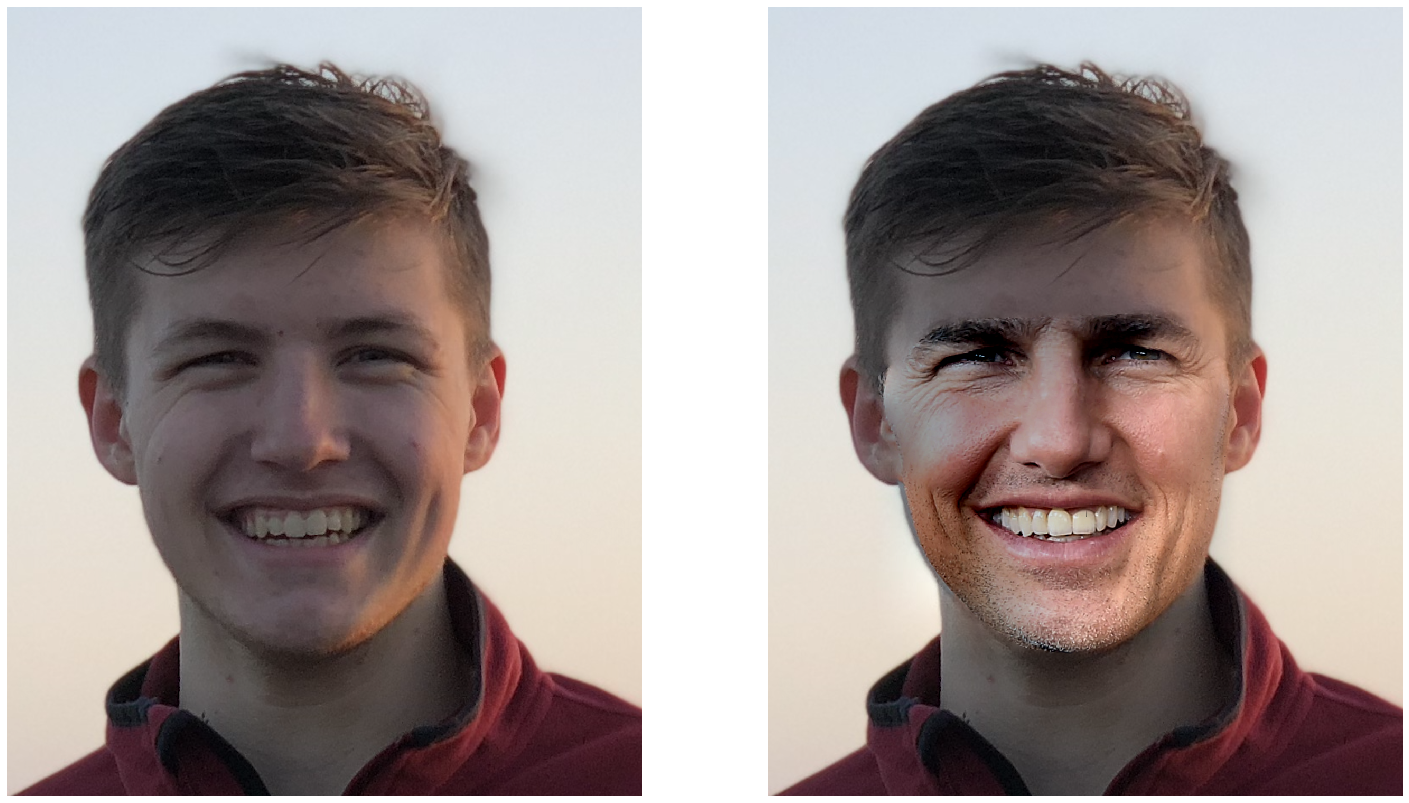

In [5]:
_, ax = plt.subplots(1, 2, figsize=(25, 20))
ax[0].imshow(img)
ax[1].imshow(img_swap)
ax[0].axis(False)
ax[1].axis(False)
plt.show()

## Swap two faces

In [6]:
face_swapping = TwoFaceSwapping(reference_path='imgs/reference.png')
img = face_swapping.load_img('imgs/two_.jpg')
img_swap = face_swapping(img)

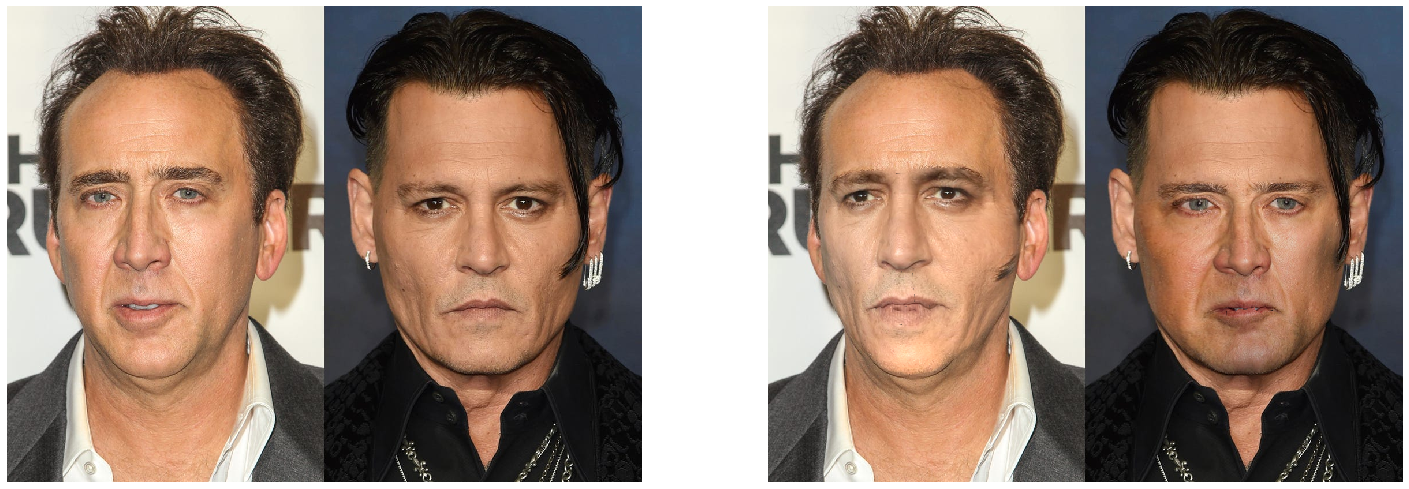

In [8]:
_, ax = plt.subplots(1, 2, figsize=(25, 20))
ax[0].imshow(img)
ax[1].imshow(img_swap)
ax[0].axis(False)
ax[1].axis(False)

plt.show()

## Realtime Swapping

In [9]:
import numpy as np
import cv2
from fswap import RefFaceSwapping
import traceback

face_swapping = RefFaceSwapping(reference_path='imgs/reference.png', color_format='BGR')

In [ ]:
cap = cv2.VideoCapture(0)

while(True):
    try:
        ret, frame = cap.read()
        if frame is None:
            print('bl')
        cv2.imshow("preview", face_swapping(frame))
#         cv2.imshow('preview', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    except Exception as e:
        print('Error:', traceback.format_exc())
        break
    

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()